## Introduction ##

## Preliminary Data Exploration ##

In [1]:
### Run this cell before continuing.
import altair as alt
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn import set_config
from sklearn.compose import make_column_transformer
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.model_selection import (
    GridSearchCV,
    RandomizedSearchCV,
    cross_validate,
    train_test_split,
)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import cross_val_score, cross_validate, train_test_split

# Simplify working with large datasets in Altair
alt.data_transformers.disable_max_rows()

# Output dataframes instead of arrays
set_config(transform_output="pandas")

In [2]:
URL = "https://raw.githubusercontent.com/adipoluri/DSCI-100-Project/main/diabetes.csv"
diabetes_raw_df = pd.read_csv(URL)
diabetes_raw_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


We noticed that there were 0 values in the following columns: "Glucose", "BloodPressure", "SkinThickness", "Insulin" and "BMI.

On pg 263 of the paper that previously used this dataset(see the "Past Usage" section in the Kaggle link), we can see from Table 1 that there were "BLANK" values for each of these features. We believe the 0 values that we're seeing in the columns represent those "BLANK" values, so we have decided to remove examples that have 0 in any of those columns from the dataset we'll be using for the remainder of this project (see below).

In [3]:
diabetes_df = diabetes_raw_df[
(diabetes_raw_df["Glucose"] > 0) & (diabetes_raw_df["BloodPressure"] > 0) & (diabetes_raw_df["SkinThickness"] > 0) &
(diabetes_raw_df["Insulin"] > 0) & (diabetes_raw_df["BMI"] > 0)]

diabetes_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1
13,1,189,60,23,846,30.1,0.398,59,1
...,...,...,...,...,...,...,...,...,...
753,0,181,88,44,510,43.3,0.222,26,1
755,1,128,88,39,110,36.5,1.057,37,1
760,2,88,58,26,16,28.4,0.766,22,0
763,10,101,76,48,180,32.9,0.171,63,0


In [4]:
diabetes_df.describe(include = "all")

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,3.301020,122.627551,70.663265,29.145408,156.056122,33.086224,0.523046,30.864796,0.331633
std,3.211424,30.860781,12.496092,10.516424,118.841690,7.027659,0.345488,10.200777,0.471401
min,0.000000,56.000000,24.000000,7.000000,14.000000,18.200000,0.085000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,21.000000,76.750000,28.400000,0.269750,23.000000,0.000000
50%,2.000000,119.000000,70.000000,29.000000,125.500000,33.200000,0.449500,27.000000,0.000000
75%,5.000000,143.000000,78.000000,37.000000,190.000000,37.100000,0.687000,36.000000,1.000000
max,17.000000,198.000000,110.000000,63.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
train_df, test_df = train_test_split(diabetes_df, test_size=0.25, random_state=123)

In [6]:
train_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
260,3,191,68,15,130,30.9,0.299,34,0
548,1,164,82,43,67,32.8,0.341,50,0
27,1,97,66,15,140,23.2,0.487,22,0
320,4,129,60,12,231,27.5,0.527,31,0
599,1,109,38,18,120,23.1,0.407,26,0
...,...,...,...,...,...,...,...,...,...
450,1,82,64,13,95,21.2,0.415,23,0
204,6,103,72,32,190,37.7,0.324,55,0
631,0,102,78,40,90,34.5,0.238,24,0
744,13,153,88,37,140,40.6,1.174,39,0


In [7]:
train_summary = train_df.describe()
train_summary

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000
mean,3.302721,123.908163,70.721088,29.187075,156.996599,33.324830,0.540650,30.955782,0.340136
std,3.245400,31.507002,12.458139,10.518099,123.516604,7.380823,0.358113,10.348604,0.474562
min,0.000000,56.000000,30.000000,7.000000,14.000000,18.200000,0.085000,21.000000,0.000000
25%,1.000000,100.000000,62.000000,22.000000,76.000000,28.400000,0.289000,23.000000,0.000000
50%,2.000000,120.000000,70.000000,29.000000,126.000000,33.100000,0.465000,27.000000,0.000000
75%,5.000000,144.750000,78.000000,37.000000,190.750000,37.575000,0.690750,36.750000,1.000000
max,17.000000,198.000000,110.000000,63.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 294 entries, 260 to 711
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               294 non-null    int64  
 1   Glucose                   294 non-null    int64  
 2   BloodPressure             294 non-null    int64  
 3   SkinThickness             294 non-null    int64  
 4   Insulin                   294 non-null    int64  
 5   BMI                       294 non-null    float64
 6   DiabetesPedigreeFunction  294 non-null    float64
 7   Age                       294 non-null    int64  
 8   Outcome                   294 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 23.0 KB


In [9]:
numeric_cols_initial = list(train_summary.select_dtypes([np.number]).columns) 
numeric_cols_initial

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

In [10]:
numeric_cols = numeric_cols_initial[:8]
numeric_cols

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

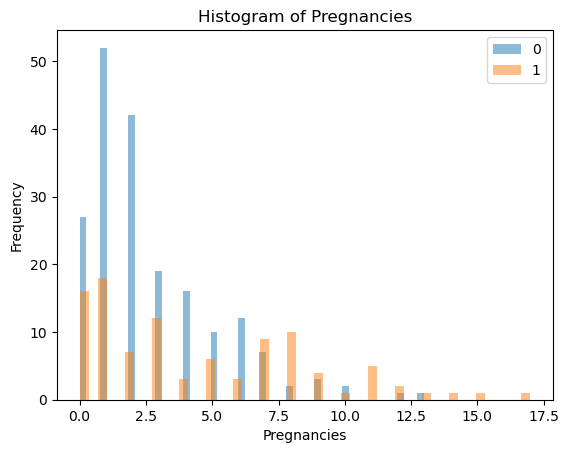

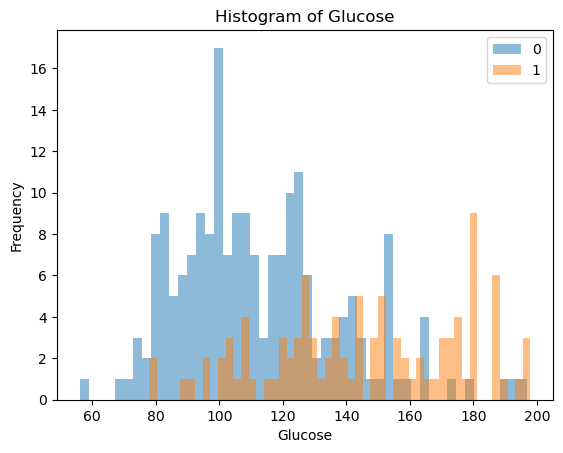

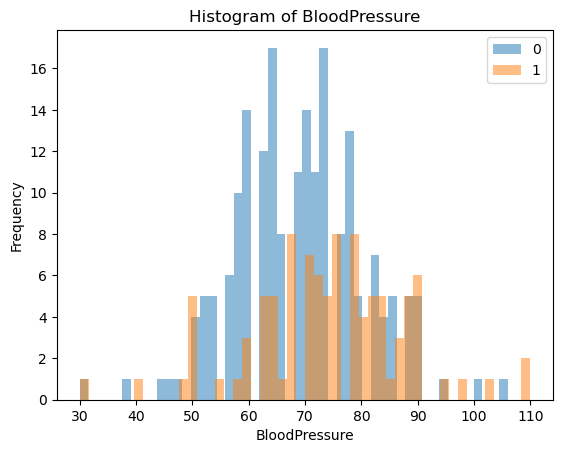

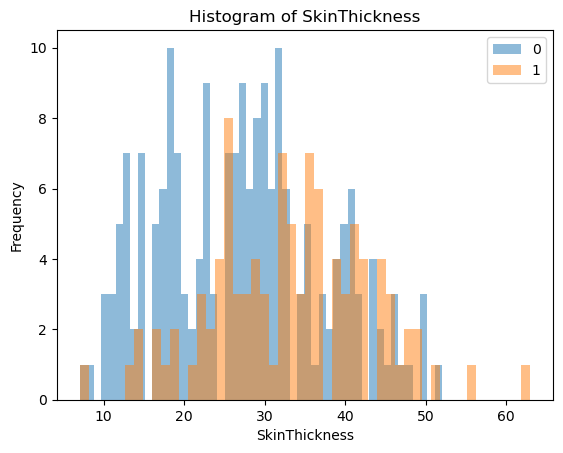

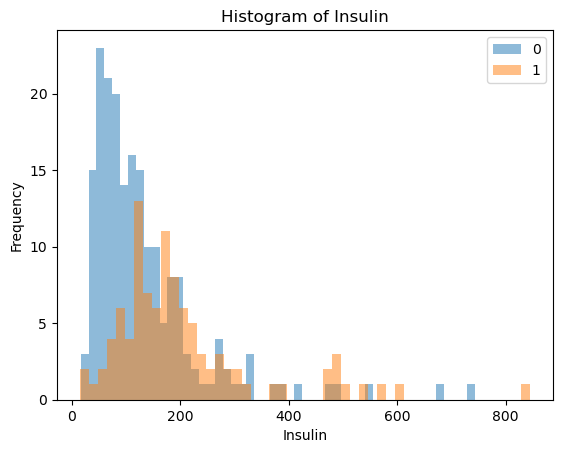

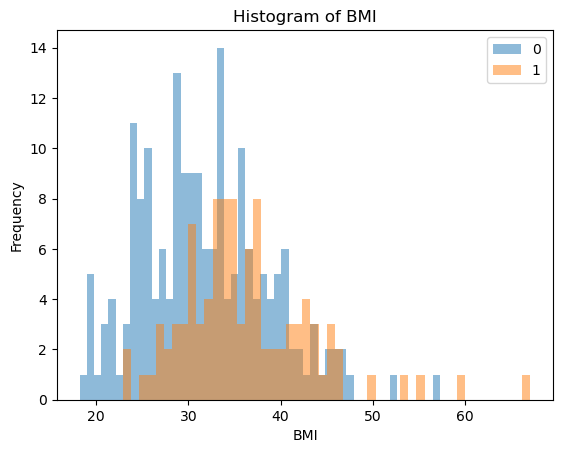

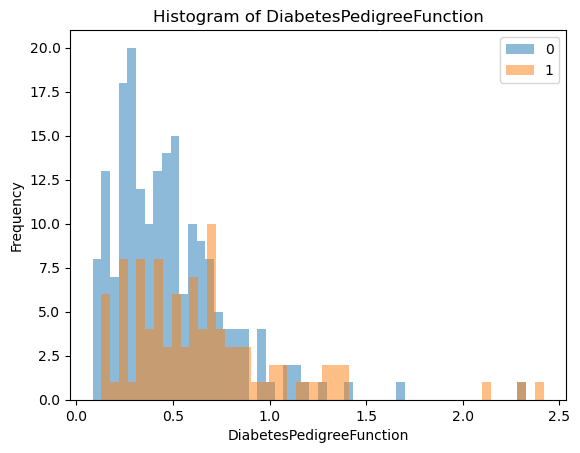

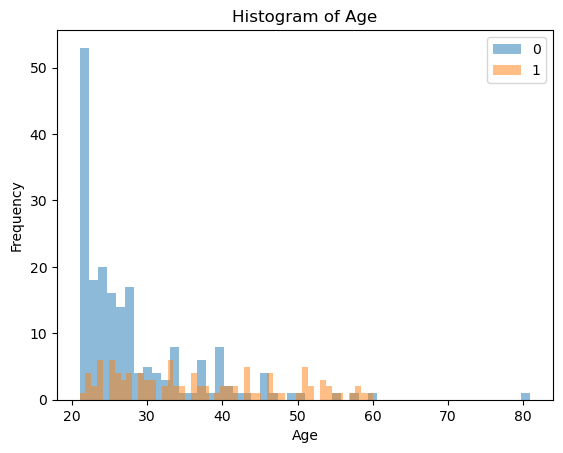

In [11]:
for n in numeric_cols:

    ax = train_df.groupby("Outcome")[n].plot.hist(bins=50, alpha=0.5, legend=True)
    plt.xlabel(n)
    plt.title("Histogram of " + n)
    plt.show()

## Methods ##

From the histograms above, we can see that some variables look like they'll be more useful for our predictions than others. 

We looked for the variables where we can see some separation in the histograms between the "1" class (ie has diabetes) and the "0" class (ie doesn't have diabetes). So, we decided to use "Glucose", "BloodPressure", "SkinThickness", "Insulin" and "Diabetes" as the "useful" variables in our data analysis.

For the actual data analysis, we will be using K-Nearest Neighbours as our estimator.

In [12]:
X_train, y_train = (
    train_df.drop(columns=["Pregnancies", "Age", "BMI", "Outcome"]),
    train_df["Outcome"],
)
X_test, y_test = (
    test_df.drop(columns=["Pregnancies", "Age", "BMI", "Outcome"]),
    test_df["Outcome"],
)
X_train

,Glucose,BloodPressure,SkinThickness,Insulin,DiabetesPedigreeFunction
260,191,68,15,130,0.299
548,164,82,43,67,0.341
27,97,66,15,140,0.487
320,129,60,12,231,0.527
599,109,38,18,120,0.407
...,...,...,...,...,...
450,82,64,13,95,0.415
204,103,72,32,190,0.324
631,102,78,40,90,0.238
744,153,88,37,140,1.174


In [13]:
models = {
    "decision tree": DecisionTreeClassifier(random_state=42),
    "kNN": KNeighborsClassifier(),
    "RBF SVM": SVC(random_state=42),
}

In [14]:
diabetes_pred_results_dict = {}
diabetes_pred_results_dict

{}

In [15]:
def mean_std_cross_val_scores(model, X_train, y_train, **kwargs):
    """
    Returns mean and std of cross validation

    Parameters
    ----------
    model :
        scikit-learn model
    X_train : numpy array or pandas DataFrame
        X in the training data
    y_train :
        y in the training data

    Returns
    ----------
        pandas Series with mean scores from cross_validation
    """

    scores = cross_validate(model, X_train, y_train, **kwargs)

    mean_scores = pd.DataFrame(scores).mean()
    std_scores = pd.DataFrame(scores).std()
    out_col = []

    for i in range(len(mean_scores)):
        out_col.append((f"%0.3f (+/- %0.3f)" % (mean_scores[i], std_scores[i])))

    return pd.Series(data=out_col, index=mean_scores.index)

In [16]:
pipe_dt = make_pipeline(StandardScaler(), models["decision tree"])
diabetes_pred_results_dict[models["decision tree"]] = mean_std_cross_val_scores(
    pipe_dt, X_train, y_train, cv=5, return_train_score=True
)
diabetes_pred_results_df = pd.DataFrame(diabetes_pred_results_dict).T
diabetes_pred_results_df

,fit_time,score_time,test_score,train_score
DecisionTreeClassifier(random_state=42),0.005 (+/- 0.001),0.005 (+/- 0.007),0.650 (+/- 0.020),1.000 (+/- 0.000)


In [17]:
pipe_knn = make_pipeline(StandardScaler(), models["kNN"])
diabetes_pred_results_dict[models["kNN"]] = mean_std_cross_val_scores(
    pipe_knn, X_train, y_train, cv=5, return_train_score=True
)
diabetes_pred_results_df = pd.DataFrame(diabetes_pred_results_dict).T
diabetes_pred_results_df

,fit_time,score_time,test_score,train_score
DecisionTreeClassifier(random_state=42),0.005 (+/- 0.001),0.005 (+/- 0.007),0.650 (+/- 0.020),1.000 (+/- 0.000)
KNeighborsClassifier(),0.004 (+/- 0.000),0.005 (+/- 0.000),0.728 (+/- 0.058),0.810 (+/- 0.016)


In [18]:
pipe_rbf = make_pipeline(StandardScaler(), models["RBF SVM"])
diabetes_pred_results_dict[models["RBF SVM"]] = mean_std_cross_val_scores(
    pipe_rbf, X_train, y_train, cv=5, return_train_score=True
)
diabetes_pred_results_df = pd.DataFrame(diabetes_pred_results_dict).T
diabetes_pred_results_df

,fit_time,score_time,test_score,train_score
DecisionTreeClassifier(random_state=42),0.005 (+/- 0.001),0.005 (+/- 0.007),0.650 (+/- 0.020),1.000 (+/- 0.000)
KNeighborsClassifier(),0.004 (+/- 0.000),0.005 (+/- 0.000),0.728 (+/- 0.058),0.810 (+/- 0.016)
SVC(random_state=42),0.005 (+/- 0.000),0.003 (+/- 0.002),0.724 (+/- 0.053),0.826 (+/- 0.005)


In [19]:
results_dict = {
    "n_neighbors": [],
    "mean_train_score": [],
    "mean_cv_score": [],
    "std_cv_score": [],
    "std_train_score": [],
}
param_grid = {"n_neighbors": np.arange(1, 50, 5)}

for k in param_grid["n_neighbors"]:
    pipe_knn2 = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=k))
    scores = cross_validate(pipe_knn2, X_train, y_train, return_train_score=True)
    results_dict["n_neighbors"].append(k)

    results_dict["mean_cv_score"].append(np.mean(scores["test_score"]))
    results_dict["mean_train_score"].append(np.mean(scores["train_score"]))
    results_dict["std_cv_score"].append(scores["test_score"].std())
    results_dict["std_train_score"].append(scores["train_score"].std())

results_df = pd.DataFrame(results_dict)

In [20]:
results_df = results_df.set_index("n_neighbors")
results_df

,mean_train_score,mean_cv_score,std_cv_score,std_train_score
n_neighbors,,,,
1,1.000000,0.659848,0.018713,0.000000
6,0.789098,0.693863,0.038707,0.010929
11,0.772943,0.731034,0.038495,0.011268
16,0.764432,0.741204,0.052627,0.017010
21,0.767825,0.744652,0.051803,0.020723
26,0.757638,0.734483,0.045171,0.013162
31,0.763588,0.744711,0.047903,0.016724
36,0.769546,0.751490,0.041091,0.015718
41,0.770389,0.744711,0.045441,0.013200


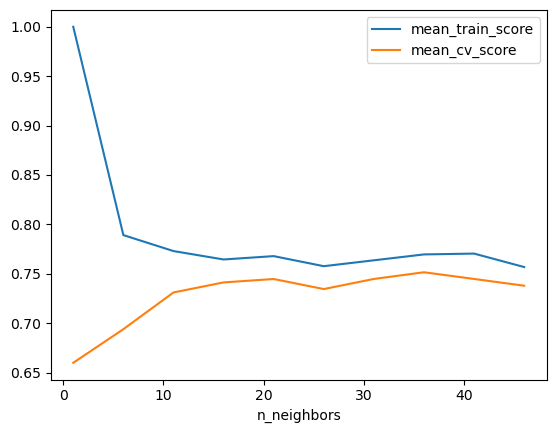

In [21]:
results_df[["mean_train_score", "mean_cv_score"]].plot();

In [22]:
best_n_neighbours = results_df.idxmax()["mean_cv_score"]
best_n_neighbours

36

In [29]:
pipe_best = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=21))
diabetes_fit = pipe_best.fit(X_train, y_train)
print("Test accuracy: %0.3f" % (pipe_best.score(X_test, y_test)))

Test accuracy: 0.796


In [33]:
diabetes_test_predictions = test_df.assign(
    Predicted=diabetes_fit.predict(X_test)
)
diabetes_test_predictions

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Predicted
429,1,95,82,25,180,35.0,0.233,43,1,0
480,3,158,70,30,328,35.5,0.344,35,1,1
285,7,136,74,26,135,26.0,0.647,51,0,0
301,2,144,58,33,135,31.6,0.422,25,1,0
763,10,101,76,48,180,32.9,0.171,63,0,0
...,...,...,...,...,...,...,...,...,...,...
248,9,124,70,33,402,35.4,0.282,34,0,0
360,5,189,64,33,325,31.2,0.583,29,1,1
91,4,123,80,15,176,32.0,0.443,34,0,0
390,1,100,66,29,196,32.0,0.444,42,0,0


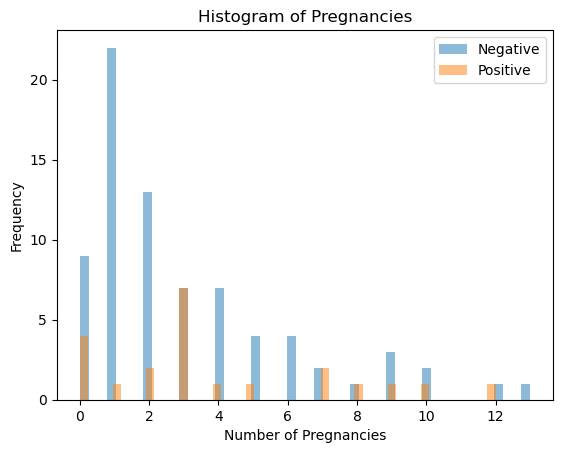

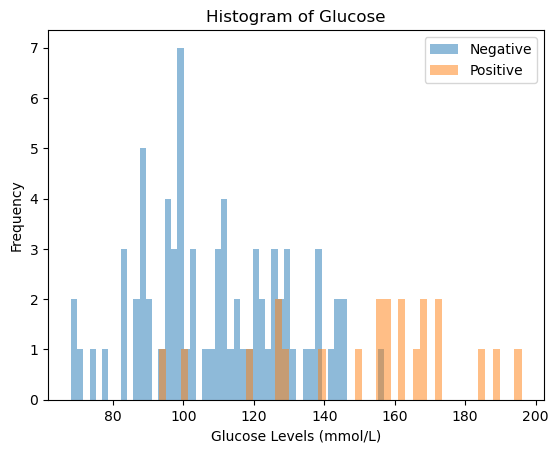

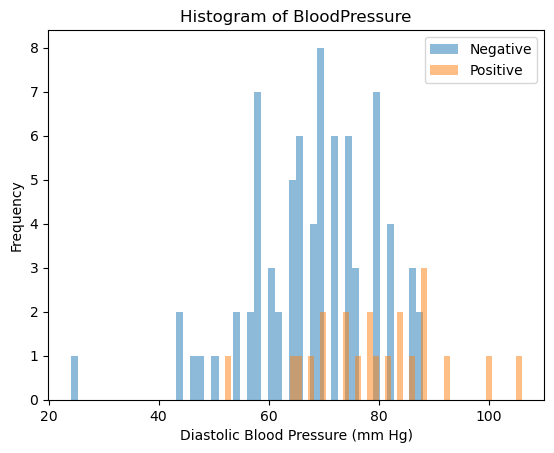

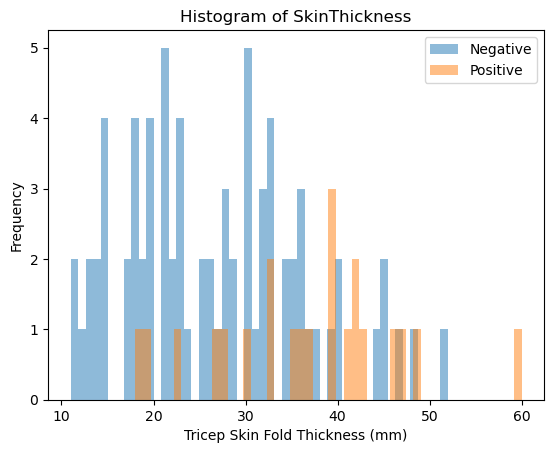

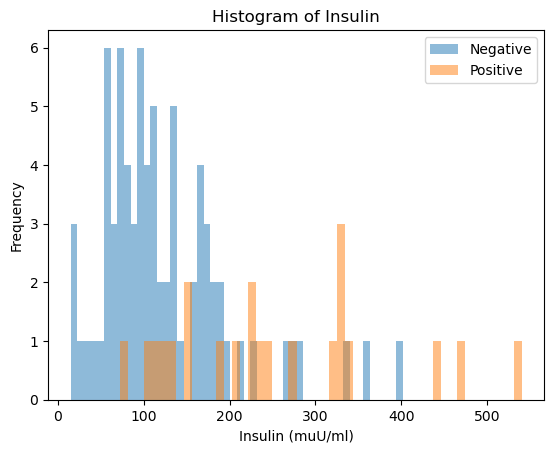

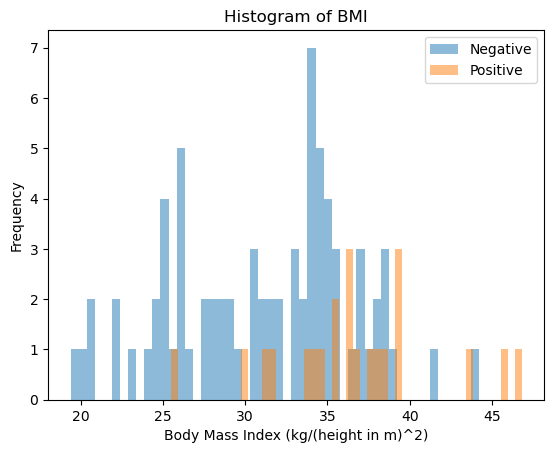

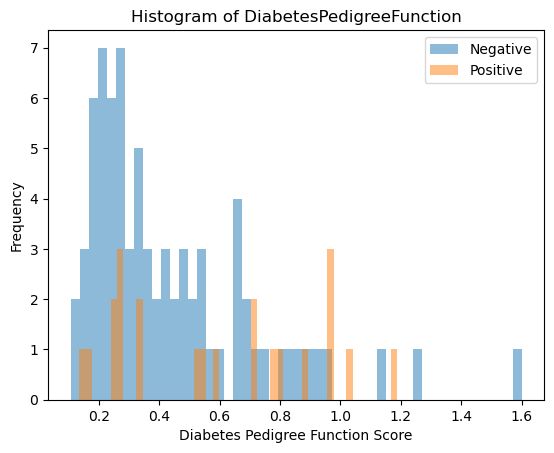

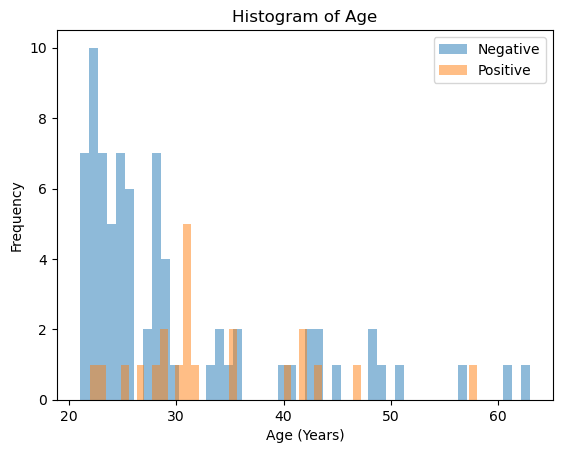

In [41]:
## Pregnancies ##
units = {
    "Pregnancies":"Number of Pregnancies",
    "Glucose":"Glucose Levels (mmol/L)",
    "BloodPressure":"Diastolic Blood Pressure (mm Hg)",
    "SkinThickness":"Tricep Skin Fold Thickness (mm)",
    "Insulin":"Insulin (muU/ml)",
    "BMI":"Body Mass Index (kg/(height in m)^2)",
    "DiabetesPedigreeFunction":"Diabetes Pedigree Function Score",
    "Age":"Age (Years)",
}

for n in numeric_cols:
    ax = diabetes_test_predictions.groupby("Predicted")[n].plot.hist(bins=50, alpha=0.5, legend=True)
    plt.xlabel(units[n])
    plt.title("Histogram of " + n)
    plt.legend(["Negative","Positive"])
    plt.show()

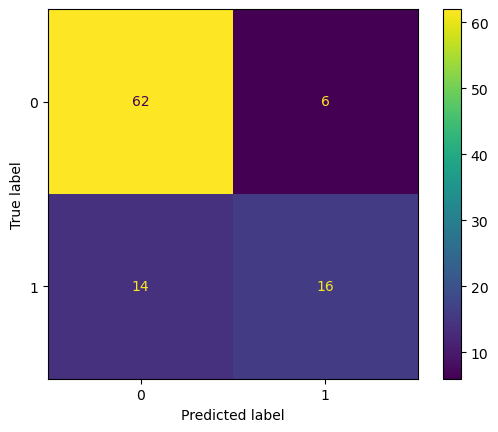

In [36]:
from sklearn.metrics import ConfusionMatrixDisplay  # Recommended method in sklearn 1.0
from sklearn.model_selection import cross_val_predict

ConfusionMatrixDisplay.from_estimator(pipe_best, X_test, y_test);

In [43]:
columns_to_plot = [
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'DiabetesPedigreeFunction',
 'Predicted']

credit_pairplot = alt.Chart(diabetes_test_predictions).mark_point().encode(
    alt.X(alt.repeat("row"), type="quantitative"),
    alt.Y(alt.repeat("column"), type="quantitative"),
).properties(
    width=200,
    height=200
).repeat(
    column=columns_to_plot,
    row=columns_to_plot
)
credit_pairplot

alt.RepeatChart(...)